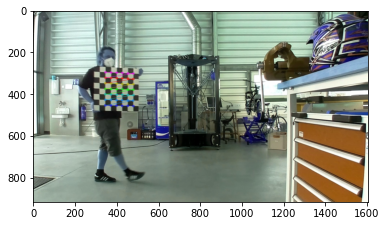

In [1]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*6,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('*.jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (6,7), None)
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners)
            
        # Draw and display the corners
        cv.drawChessboardCorners(img, (6,7), corners2, ret)
        cv.imwrite('Correction.png', img)
        plt.imshow(img)

In [2]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("Camera Calibration:\n ",ret)
print("\nCamera Matrix:\n ",mtx)
print("\nDistortion Parameters\n: ",dist)
print("\nRotation Vectors:\n ",rvecs)
print("\nTranslation Vectors:\n ",tvecs)

Camera Calibration:
  0.10844631474195367

Camera Matrix:
  [[1.30094680e+03 0.00000000e+00 8.05132034e+02]
 [0.00000000e+00 1.28451263e+03 4.39329328e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Parameters
:  [[-0.29588636  1.35905538 -0.01655636  0.00887957 -2.83534735]]

Rotation Vectors:
  [array([[ 0.18954156],
       [-0.06663481],
       [-1.55783747]]), array([[-0.43253227],
       [ 0.15844424],
       [ 3.10181721]]), array([[ 0.46560756],
       [-0.12550459],
       [-3.10240064]])]

Translation Vectors:
  [array([[-11.86054979],
       [ -2.35672444],
       [ 75.84564293]]), array([[-13.50991092],
       [  0.26852184],
       [ 47.73983679]]), array([[-12.34094109],
       [  0.76396396],
       [ 48.3815291 ]])]


In [3]:
from numpy.linalg import inv
inv(mtx)

array([[ 7.68670940e-04,  0.00000000e+00, -6.18881597e-01],
       [ 0.00000000e+00,  7.78505386e-04, -3.42020248e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [4]:
import math
import numpy as np
from numpy import linalg as LA
p1 = np.array([704, 472, 1])
p2 = np.array([833, 472, 1])
v1 = np.matmul(inv(mtx) , p1)
v2 = np.matmul(inv(mtx) , p2)
theta = math.acos(np.dot(v1,v2) / (LA.norm(v1) * LA.norm(v2)))
width_height = 2*(484*math.tan(theta/2))
distance = 25/math.tan(theta/2)
print(distance)

504.8047101236439


In [6]:
h1 = np.array([655, 217,1])
h2 = np.array([655, 654, 1])
v11 = np.matmul(inv(mtx) , h1)
v12 = np.matmul(inv(mtx) , h2)
theta1 = math.acos(np.dot(v11,v12) / (LA.norm(v11) * LA.norm(v12)))
height = 2*(505*math.tan(theta1/2))
print(height)

w1 = np.array([647, 221, 1])
w2 = np.array([893, 221, 1])
v21 = np.matmul(inv(mtx) , w1)
v22 = np.matmul(inv(mtx) , w2)
theta2 = math.acos(np.dot(v21,v22) / (LA.norm(v21) * LA.norm(v22)))
width = 2*(505*math.tan(theta2/2))
print(width)

170.6702911591744
94.07568927523353
